Notes:
* Améliorer les graphes: Titres et ettiquettes
* Ajoute K-means.

# Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

[Context](#Co)<br>
[Import packages and data](#0)<br>
    
  
1. [**Univariate analysis**](#1)<br>
    [Numerical features](#1.1)<br>
    [Categorical features](#1.2)<br>
    
    
2. [**Bivariate analysis**](#2)<br>
    [Relationships between happiness and the 6 factors](#2.1)<br>
    [Relationships between happiness and regions](#2.2)<br>
    [Relationships between the 6 factors](#2.3)   
    [Relationships between the 6 factors and regions](#2.4)<br>
    
    
3. [**Final report**](#3) <br>
</div>
<hr>

<a name="Co"></a>
# Context

The World Happiness Report is a landmark survey of the state of global happiness from 2015 to 2019 according to 6 main factors:
* economic production, 
* social support, 
* life expectancy, freedom, 
* absence of corruption, 
* and generosity

### Purposes of the project
<ins> Data analysis: </ins>
1. Give a clear picture of happiness around the world in 2019
    * In which countries/regions of the world are people the happiest?
    * Which factors explain the differences in happiness ? 
2. Analyse trends in happiness from 2015 to 2019
    * In which countries/regions happiness has increased the most during this period?
    * What does explains this growth?
    
<ins> Forecasting with Machine Learning</ins>(*)
1. How happy will countries be in 2020 ?
2. In which countries happiness will increase in 2020 ?

(*) _Although data don't contain related information, the global pandemic may have a tremendous impact on the results

You can find the whole presentation and information about the data in the **Project Presentation** notebook

### Workflow
* **Cleaning**
* EDA
* Data Visualization
* Preprocessing
* Machine Learning

The first step of this project is to handle the different data files and detect and correct/remove corrupt or inaccurate records from the data to ensure that further analysis will be based on meaningful and relevant information.

----------
Now we have cleaned our data, the exploratory step, also called Exploratiry Data Analysis (EDA) is about knowing your data, gaining a certain amount of familiarity with the data and extracting insights from it.There are many benefits of performing EDA, such as:
* To gain an understanding of data
* to reveal underlying patterns, structures and relationships in the data
* to formulate assumptions and hypothesis for our modelling; 
* to check the quality of data after it has been cleaned

Note that EDA is not data vizualation. EDA is a technical step to get insight for data vizualition (reporting and story telling) and modelisation

------------
------------
<a name="0"></a>
# Import packages and data

Let's first import the required packages investigate and plot data: **pandas**, **numpy** and **matplotlib** and **seaborn**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from Utils import print_title1

We now import the cleaned data

In [2]:
df = pd.read_csv('data/data_clean_norm.csv')
print(df.shape)
display(df.sample(5))

(705, 11)


,corruption_perception,country,freedom,gdp_per_capita,generosity,happiness_rank,happiness_score,life_expectancy,region,social_support,year
92,82.592700,Belgium,74.553967,69.836868,45.215496,17,82.190665,71.699550,Western Europe,88.948461,2017
512,31.340862,Zimbabwe,46.461907,17.931609,36.942089,128,21.014199,17.244851,Sub-Saharan Africa,65.881746,2017
113,100.000000,Singapore,87.154696,72.948473,50.976562,33,71.075051,88.343558,Southeastern Asia,88.260341,2018
400,8.599602,Serbia,27.772099,43.918416,37.560547,81,46.328600,65.588081,Central and Eastern Europe,61.413625,2015
534,17.416084,Congo (Kinshasa),37.154696,4.484733,41.406250,117,32.028398,31.288344,Sub-Saharan Africa,68.430657,2019


------------
------------
<a name="1"></a>
# 1. Univariate analysis

Our first task is to analyze distribution for each feature.Since our dataset contains data between 2015 and 2019, we will plot values separatly for each year of study.

------------
<a name="1.1"></a>
## 1.1 Numerical features

We select numerical data from our DataFrame

In [3]:
# Select numerical features from df
display(pd.DataFrame({"numerical columns":df._get_numeric_data().columns.tolist()}))

# list containing the 6 factors
l_factors = ['life_expectancy', 'gdp_per_capita', 'social_support', 
             'freedom','generosity', 'corruption_perception']

,numerical columns
0,corruption_perception
1,freedom
2,gdp_per_capita
3,generosity
4,happiness_rank
5,happiness_score
6,life_expectancy
7,social_support
8,year


We are now going to have a look over the distrubition of `happiness score` and the 6 factors.
We first define **num_analysis** function we will apply on the variables to explore their distribution

In [4]:
def num_analysis(df, col):
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    """
    Gives gescriptive statistics and plot distribution and boxplot 
    of a numerical variable for each year between 2015 and 2019
    
    input
    -----
    df: DataFrame
        the dataset containing the variable
    col: string
        name of the variable
    """
    # We create a DataFrame where we'll store descriptive statistics for each year
    df_des = pd.DataFrame()
    # for each year, store descriptive statistics
    for year in range(2015, 2020):
        df_year = df[df["year"]==year]
        df_des = pd.concat([df_des, df_year[col].describe()],axis=1)
    # rename columns
    df_des.columns=[str(year) for year in range(2015,2020)]
    # display DataFrame
    display(df_des) 

    # Distribution plot
    #plot = sns.displot(df, col="year", x=col, height=3, aspect=.9, bins=11)
    #plot.set(xticks=range(0,101,25))
    #plt.show()
    
    fig = plt.figure(figsize=(15,3))
    j = 151
    for y in range(2015,2020):
        df_year = df[df["year"]==y]
        plt.subplot(j)
        plt.hist(df_year[col])
        plt.xticks(range(0,100,20))
        j+=1
        plt.title(str(y), y=-0.3)
    fig.suptitle(col+" histogram", fontsize=15)
    plt.show()
    
    # Boxplots
    fig2 = plt.figure(figsize = (15, 3))
    sns.boxplot(x='year', y=col, data=df)
    plt.title(str(y), y=-0.3)
    fig2.suptitle(col+ " boxplot", fontsize=15)
    plt.show()

-------------------
 happiness_score
-------------------


,2015,2016,2017,2018,2019
count,141.000000,141.000000,141.000000,141.000000,141.000000
mean,52.083495,51.904392,52.115432,52.761786,53.679168
std,23.729079,23.524266,22.772184,22.517453,22.233248
min,0.000000,1.338742,1.338742,1.338742,7.383367
25%,34.056795,31.744422,34.401620,34.888438,36.288032
50%,49.634888,50.202840,50.141985,53.407708,53.306288
75%,70.243408,71.318458,71.095332,69.391481,68.154158
max,96.308316,95.070994,95.294121,97.221095,100.000000


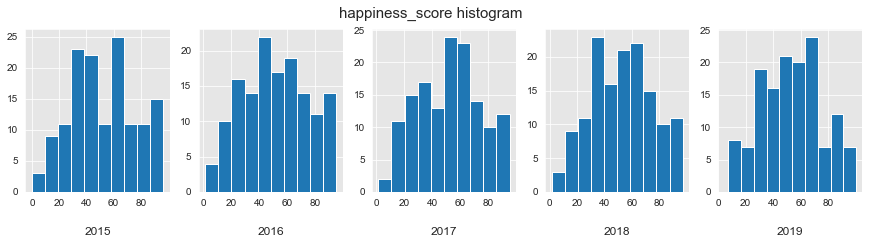

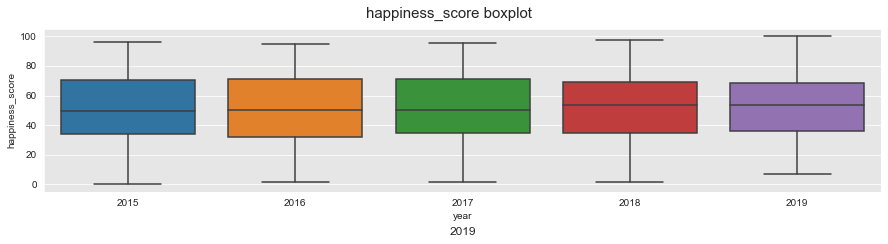

-------------------
 life_expectancy
-------------------


,2015,2016,2017,2018,2019
count,141.000000,141.000000,141.000000,141.000000,141.000000
mean,56.866895,49.762906,49.843487,53.903196,65.465779
std,20.314959,19.532576,19.327671,20.432245,19.254766
min,0.000000,0.000000,0.487708,0.000000,16.827344
25%,45.161262,37.242770,37.667257,40.052585,50.920245
50%,62.056091,54.166521,54.088013,58.632778,70.289220
75%,71.275197,63.972831,63.698356,68.448729,77.475898
max,89.855390,83.014023,83.215810,88.343558,100.000000


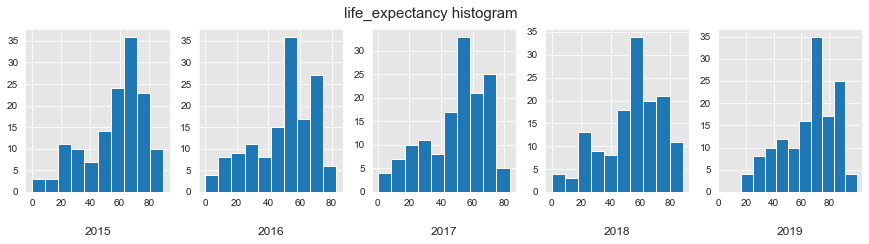

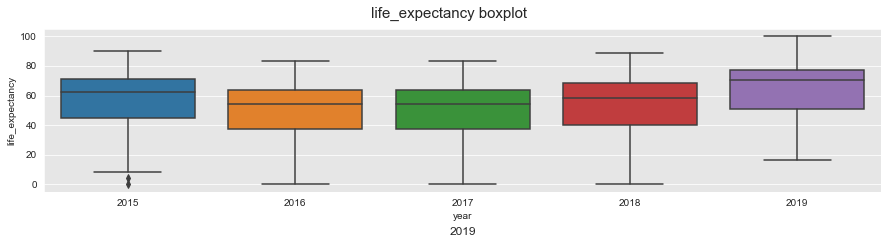

-------------------
 gdp_per_capita
-------------------


,2015,2016,2017,2018,2019
count,141.000000,141.000000,141.000000,141.000000,141.000000
mean,41.055042,45.966096,47.814006,43.351064,44.278531
std,18.862445,19.427175,19.453695,18.209374,18.206614
min,0.000000,2.700859,4.371306,3.291985,2.194656
25%,28.362595,32.832061,34.679558,31.106870,31.345420
50%,43.916508,49.156489,51.287573,46.517176,47.089695
75%,55.060115,60.881202,62.746913,57.108779,59.017176
max,80.649809,87.035782,89.254088,100.000000,80.343511


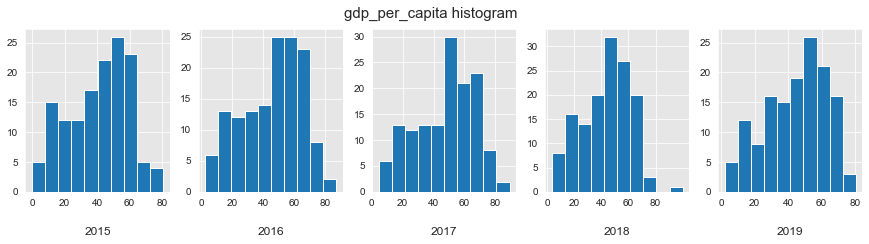

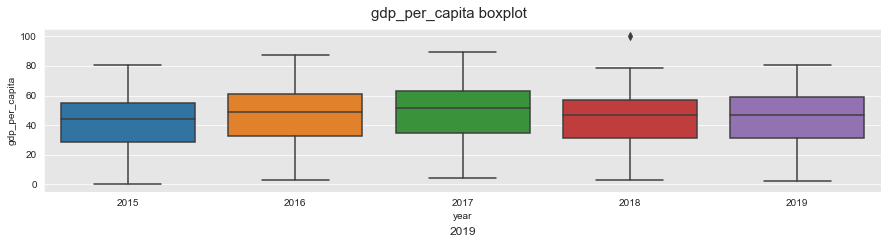

-------------------
 social_support
-------------------


,2015,2016,2017,2018,2019
count,141.000000,141.000000,141.000000,141.000000,141.000000
mean,60.849783,48.769642,73.327376,74.795517,74.730807
std,16.496174,16.442401,16.644123,17.626002,17.194380
min,8.512774,0.000000,24.093833,22.627737,22.992701
25%,52.045620,39.041363,63.459854,65.571776,66.788321
50%,62.965937,52.442822,76.640899,77.798054,79.257908
75%,74.690389,62.739051,86.918444,89.355231,88.625304
max,85.293796,71.974453,97.966789,100.000000,98.783455


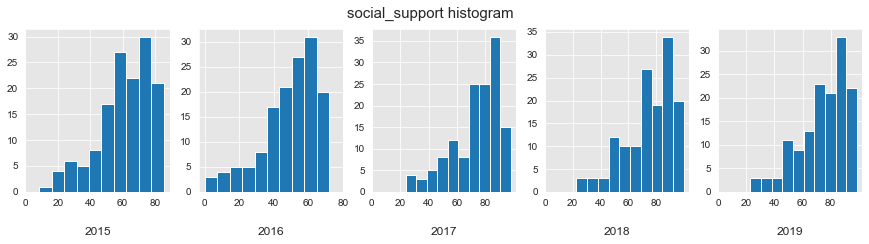

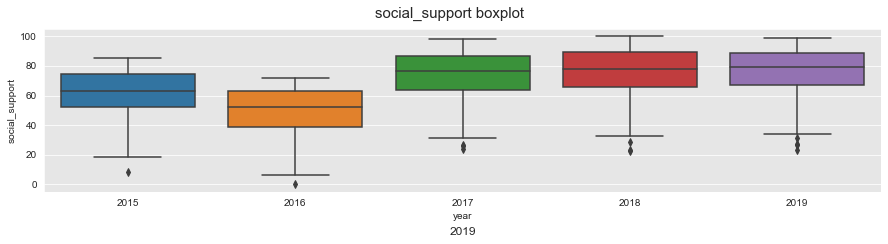

-------------------
 freedom
-------------------


,2015,2016,2017,2018,2019
count,141.000000,141.000000,141.000000,141.000000,141.000000
mean,59.465724,51.347812,57.030835,63.377219,54.628541
std,20.601029,19.486826,20.037428,21.569640,19.735932
min,0.000000,5.966851,4.194732,3.453039,0.000000
25%,45.411602,35.563536,42.349965,49.171271,42.127072
50%,60.051105,54.194751,60.421862,66.436464,58.839779
75%,75.419890,65.435083,71.062436,80.110497,70.165746
max,92.504144,84.044199,90.918324,100.000000,87.154696


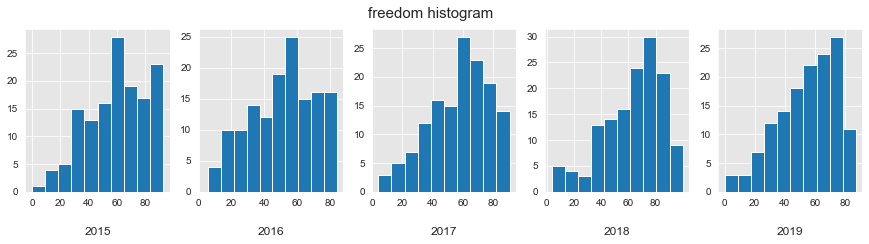

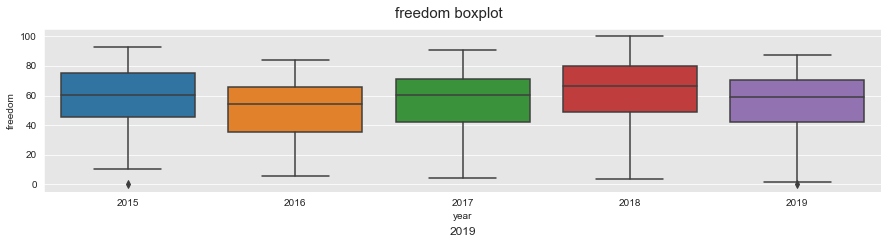

-------------------
 generosity
-------------------


,2015,2016,2017,2018,2019
count,141.000000,141.000000,141.000000,141.000000,141.000000
mean,45.557569,46.361661,47.518116,35.394504,35.714484
std,23.688429,24.603358,24.949135,19.461988,18.815319
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.488281,28.373047,29.701888,20.703125,21.093750
50%,41.968750,42.378906,44.662860,33.593750,34.179687
75%,60.751953,60.908203,63.801254,47.851562,48.242188
max,100.000000,100.000000,100.000000,100.000000,100.000000


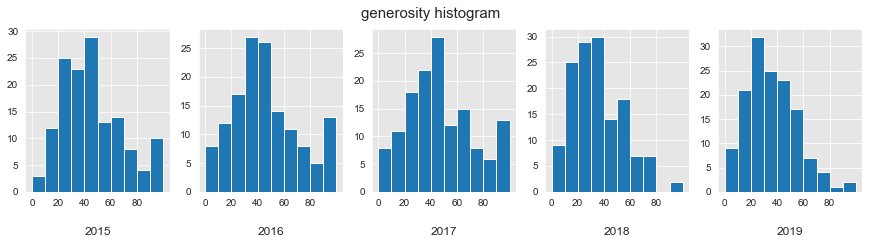

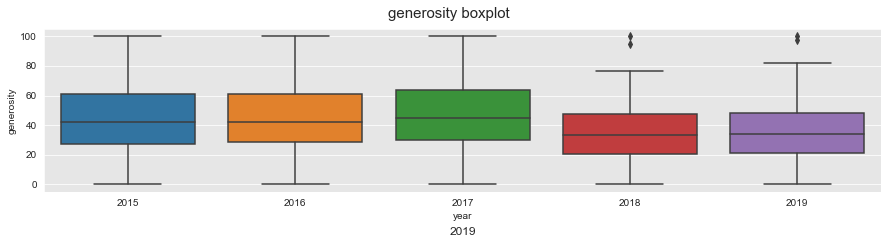

-------------------
 corruption_perception
-------------------


,2015,2016,2017,2018,2019
count,141.000000,141.000000,141.000000,141.000000,141.000000
mean,42.079077,41.482138,38.475820,35.306386,34.353198
std,30.049653,29.604087,28.807760,27.834884,27.134481
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.680175,18.303319,18.654079,16.430268,15.444452
50%,34.506849,33.974508,28.974513,26.945640,26.945640
75%,57.574945,57.364638,50.298331,44.690329,46.004751
max,100.000000,100.000000,100.000000,100.000000,100.000000


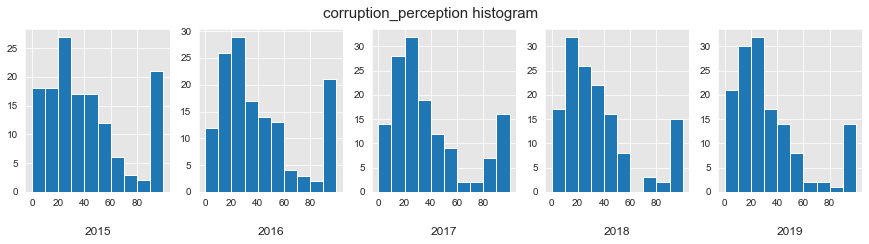

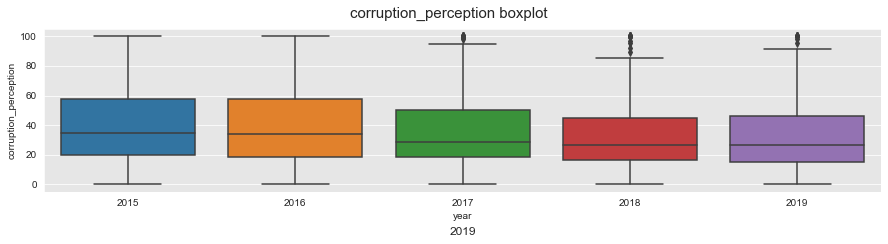

In [5]:
#for col in ['happiness_score']+l_factors:
for col in ["happiness_score"]+l_factors:
    print_title1(col)
    num_analysis(df, col)

### Observations
* `happiness score` distribution has been very similar from 2015 to 2019
* `Life expectancy` has slightly decreased from 2015 to 2017 and has increased then. As we can as with mean that has increased by 22% between 2018 and 2019.
* The distribution of `gdp_per_capita` is similar over years and there is nothing special to notice.
* After an increasing trend between 2015 and 2016 (mean -20%), `social_support` has tremendously risen in 2017 (mean +50%) and then remained stable
* `Freedom`  has slightly fluctuated from 2015 to 2019.
* `Generosity` had been staying at the same level before it collapsed in 2018 (mean -25%)
* Finally , `Corruption perception` has slightly decreased over years and became more homogeneous among countries from 2017


Overall, there is no significant difference in the distribution of the variables between 2015 and 2019. This stability is very important for forecasting because we can expect that what our models will learn from our data will be relevant for 2020

------------
<a name="1.2"></a>
## 1.2 Categorical features

The only categorical variable to explore is `region`

Sub-Saharan Africa                 22.0%
Central and Eastern Europe         19.9%
Latin America and Caribbean        14.2%
Western Europe                     14.2%
Middle East and Northern Africa    13.5%
Southeastern Asia                   5.7%
Southern Asia                       5.0%
Eastern Asia                        2.8%
North America                       1.4%
Australia and New Zealand           1.4%
Name: region, dtype: object

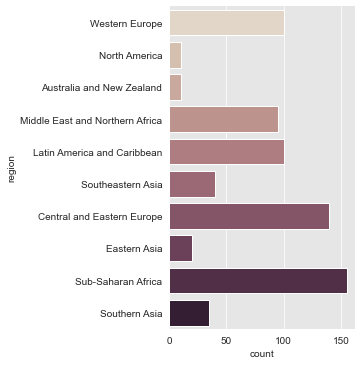

In [6]:
s = df["region"].value_counts(-1)
display(s.map(lambda x: str(round(x*100,1))+"%"))

sns.catplot(y="region", kind="count", palette="ch:.25", data=df)

As we can see, the `regions` the most represented in the dataset are Sub-Saharan Afric (22.0%) and  Central and Eastern Europe: (19.9%).
As Australia&New Zealan, North America  less than 2% of the dataset but there is no surprise. They only contain United States  and Canada.

------------
------------
<a name="2"></a>
# 2. Bivariate analysis

Vivariate analysis involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them.

------------
<a name="2.1"></a>
## 2.1 Relationship between happiness and the 6 factors

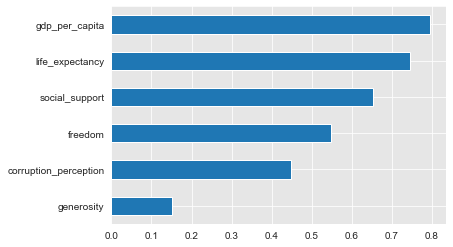

In [7]:
corr_matrix=df[["happiness_score"]+l_factors].corr()

target_corr = corr_matrix["happiness_score"].drop(['happiness_score'])

target_corr.sort_values(ascending=True).plot(kind='barh')


This graph shows different degrees of correlations between happiness score and the 6 factors:
* `gdp per capita` and `life expectancy` have **strong correlation (>0.7)**
* `social support`, `freedom` and `corruption perception` have **average correlation ([0.3 - 0.7])**
* `generosity` have **weak correlation (<0.3)**

Let's try to have a better understand of the strongest relationships:

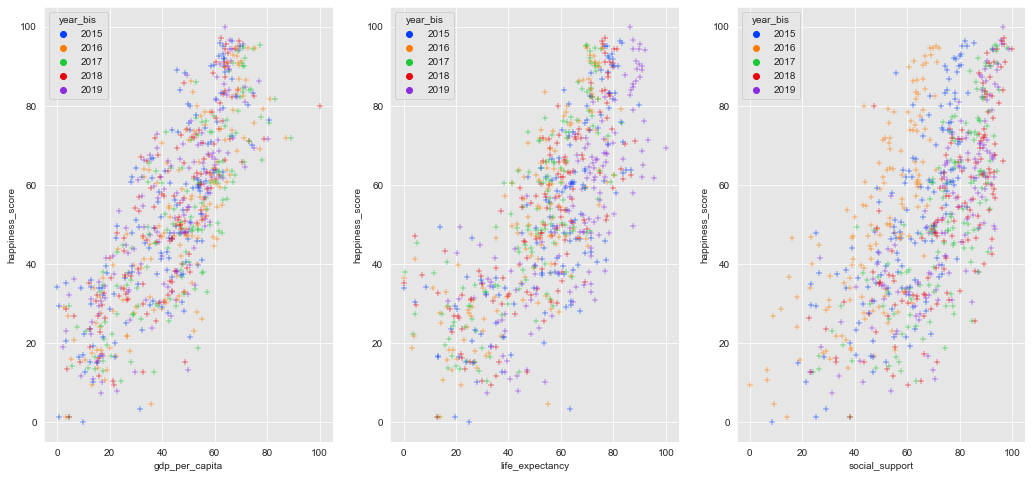

In [8]:
# Histogram
plt.figure(figsize=(30,8))
df["year_bis"] = df["year"].apply(lambda x: str(x))

i = 151 # subplot initial position
for factor in ['gdp_per_capita', 'life_expectancy', 'social_support']:
    plt.subplot(i)
    #plt.scatter(df['happiness_score'], df[factor], c = 'year')
    sns.set_palette("bright")
    plot = sns.scatterplot(x=factor, y='happiness_score', data=df, marker='+', hue="year_bis")
    i+=1

### Observations:
* `gdp per Capita` and `Life expectancy` have the most impact on `happiness`, while `generosity` has a very low impact.
* We can assume that the relationshp between `happiness` and the the 3 most correlated factors (`gdp per capita`, `life expectanc` and `soial support`) is linear

------------
<a name="2.2"></a>
## 2.2 Relationship between happiness and regions

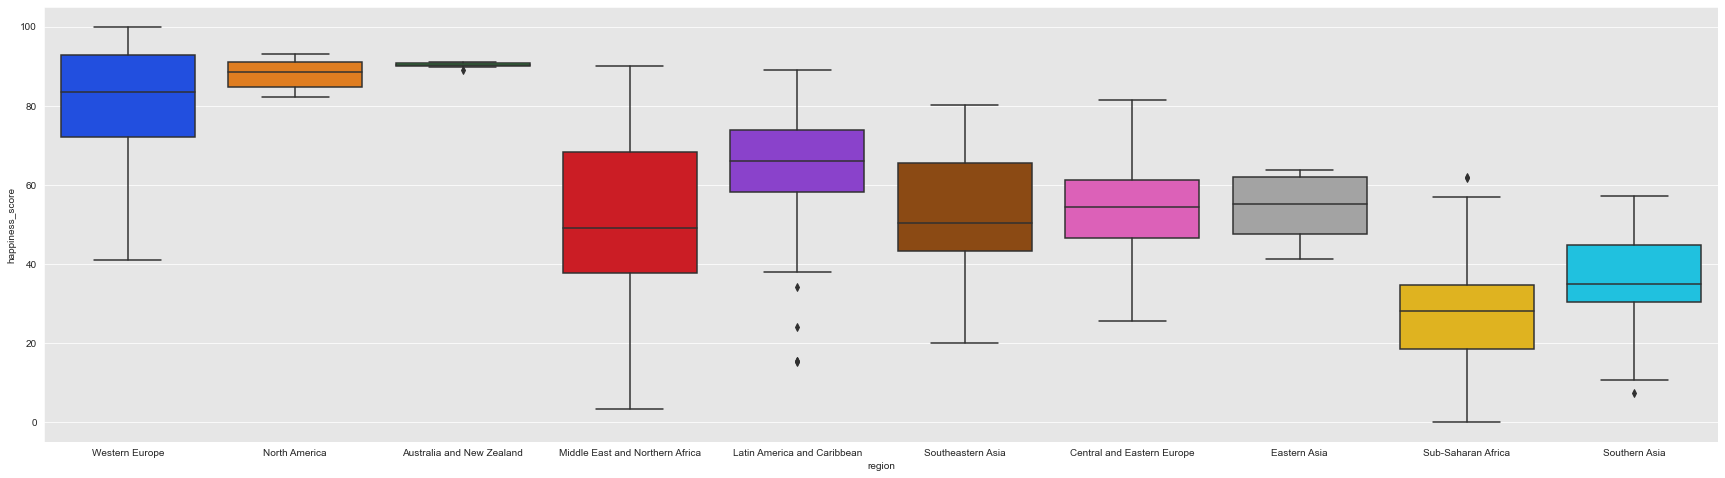

In [9]:
plt.figure(figsize=(30,8))
sns.boxplot(x="region", y="happiness_score", data=df, dodge=True)

Overall, the `happiest` countries correspond to North america, Australia & New-zealand and Western Europe.
The `least happy` countries seems to concern Southern Asia and Sub-Saharian Africa.

------------
<a name="2.3"></a>
## 2.3 Relationships between the 6 factors

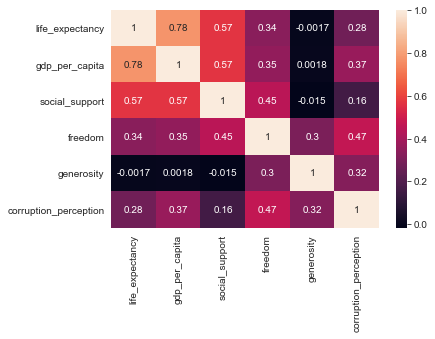

In [10]:
corr_matrix=df[l_factors].corr()


sns.heatmap(corr_matrix, annot = True)

We can notice that `GDP per capita` has a strong relationship with `life_expectancy` (0.78) and `social_support` (0.57). 
That is to say that countries with high `GDP per capita` tend to have also a good `life expectancy` and `social support`


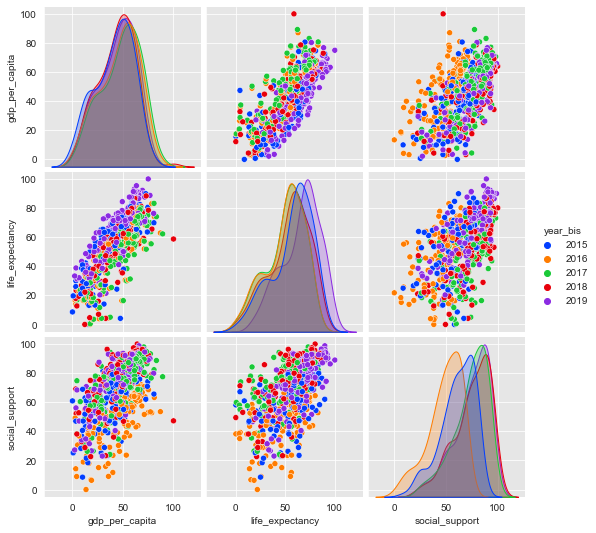

In [11]:
sns.pairplot(df[['gdp_per_capita', 'life_expectancy', 'social_support','year_bis']], hue="year_bis")

For the next scatter plots, we will plot the scatter plot for all factors, highilting happiness score with quartiles.

In [12]:
df["happiness_quartiles"]=pd.qcut(df["happiness_score"], 4, labels=["low", "low-mid", "top-mid", "top"])

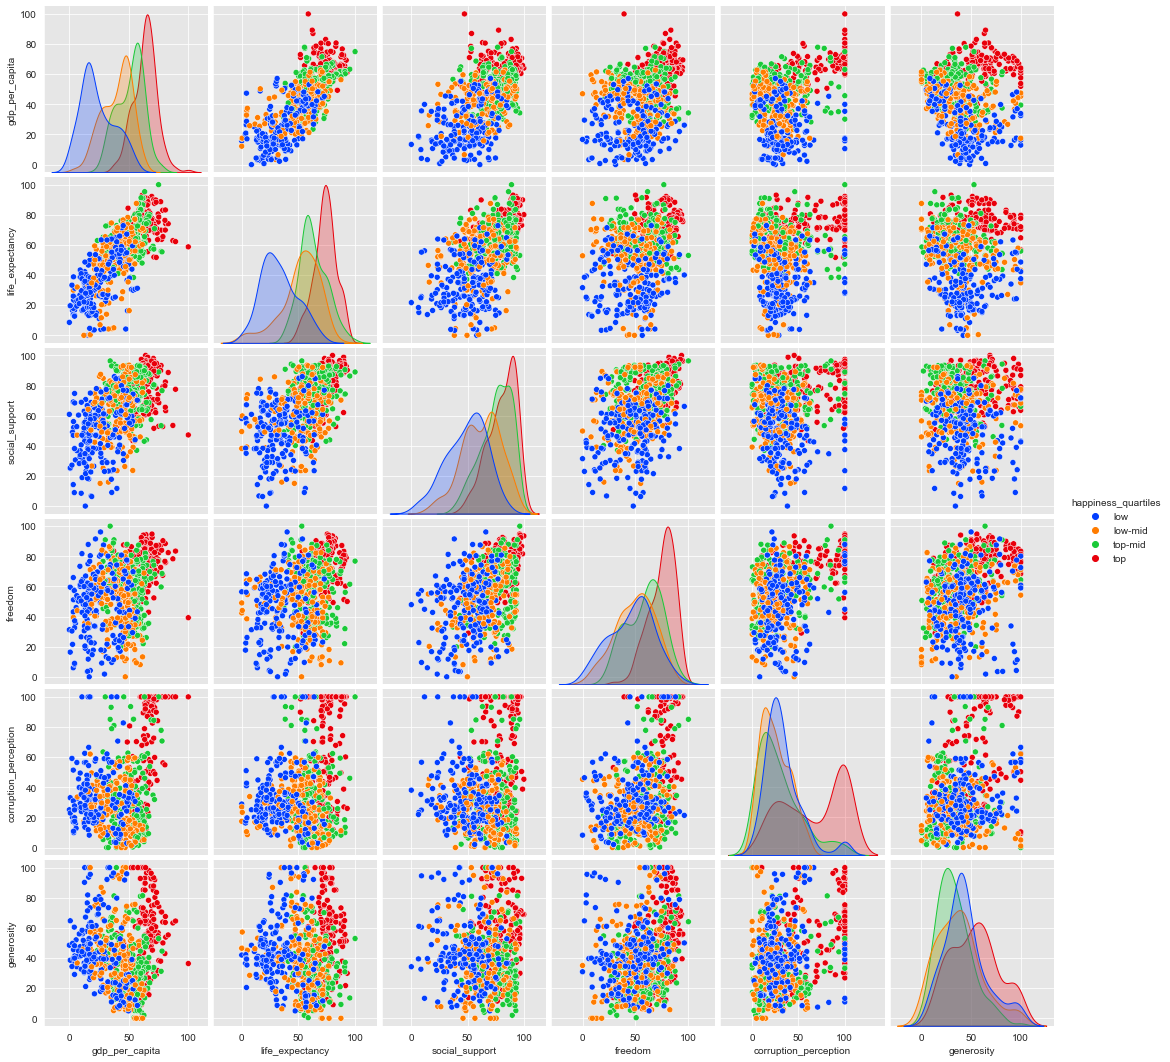

In [13]:
sns.pairplot(df[['gdp_per_capita', 'life_expectancy', 'social_support','freedom','corruption_perception','generosity', 'happiness_quartiles']],
             hue="happiness_quartiles")

Looking at the `corruption perception` graphs, we can observe that when this feature is above a certain threshold (around 60), the countries tend to be in the top happiness quartile, even if the other factors are low. This is a very interesting information. 

In [14]:
df_high_corr = df[df["corruption_perception"]>=60]

In [15]:
display(df_high_corr.shape)

s = df_high_corr["happiness_quartiles"].value_counts(-1).rename('proportion').reset_index()

sns.barplot(y="index", x='proportion', data=s, color=)

SyntaxError: invalid syntax (<ipython-input-15-78a9ed72234f>, line 5)

------------
<a name="2.4"></a>
## 2.4 Relationships between the 6 factors and regions

In [ ]:
for col in l_factors:
    plt.figure(figsize=(30,8))
    sns.boxplot(x="region", y=col, data=df, dodge=True)

### Obversations:
* As for `happiness`, the `regions` with the best overall `life expectancy` and `gdp per capita` are Western Europe, North America and Australia & New Zealand. These with the lowest ones are Sub-Saharian Africa and Sourth Asia, which have also a lower `social support` than the other regions.
* `Fredoom` is more homogeneous among `regions`. Europe, North America, and A&NZ are the regions where people feel `freedom` the most.
* Countries in Southeastern Asia, A&NZ and North America have stronger feeling of `generosity` than in other areas
* Finally, Western Europe, North America and A&NZ have a way better `perception of corruption` than in other parts of the world.

------------
------------
<a name="3"></a>
# 3. Final report

**Univaritate analysis** highlighted some slight trends and a few gaps from one year to the next but there is **no significant difference in the distribution**of the variables between 2015 and 2019.
This is a very good insight for our further modeling, especially to forecast `happiness` for which the distribution remains very similar.

Speaking of `happiness`, we saw with **bivariate analysis** `GDP per capita` and `life expectancy` had the biggest impact on it. And we could observed that this relationship was linear. That is to say that **linear regression** might be a good choice for `happiness` forecasting.

We also learnt that Western Europe, North America and Australia & New Zealand was the happiest regions. This can be explained because these 3 have also the best results in terms of `GDP per capita`, `life expectancy` and `freedom`.

At the opposite, Sourth Asia and Sub-sabarian have the worst results regarding the same factors and are the l`east happy regions`.